In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importing ml models to use
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import f1_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import mutual_info_classif

import warnings
warnings.filterwarnings("ignore")

**Features explained:**

1. **PublisherName**: The name of the company or publisher.
2. **StarRatingExternal**: The star rating assigned by an external source.
3. **StarRatingMarketplace**: The star rating assigned by a marketplace (if applicable).
4. **IsLive**: Indicates if the product or service is live.
5. **IsTransactableInclusivePrivate**: Indicates if the product or service is transactable inclusive of private transactions.
6. **FirstLiveDateTime**: The date when the product or service first went live.
7. **ServicePeriodEndDateTime**: The end date of the service period.
8. **BillingPeriodEndDateTime**: The end date of the billing period.
9. **IsGrandTotalRowTotal**: Indicates if the row represents a grand total.
10. **SumTotalPriceBeforeTaxCDAmount**: The total price before tax in CD amount.
11. **DistinctCountPurchaserTPID**: The distinct count of purchaser TPID (Transaction Participant Identifier).
12. **CountNumberOfRatingsExternal**: The count of the number of ratings from external sources.
13. **CountNumberOfRatingsMarketplace**: The count of the number of ratings from the marketplace.


#1.Data Assessing

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/ANother Feature.csv')
df.sample(10)

,PublisherName,StarRatingExternal,StarRatingMarketplace,IsLive,IsTransactableInclusivePrivate,FirstLiveDateTime,ServicePeriodEndDateTime,BillingPeriodEndDateTime,IsGrandTotalRowTotal,SumTotalPriceBeforeTaxCDAmount,DistinctCountPurchaserTPID,CountNumberOfRatingsExternal,CountNumberOfRatingsMarketplace
417881,Snowflake Inc,NaN,NaN,True,False,8/25/2020,7/22/2022,6/30/2022,False,$-,1,1,1
335019,Metaswitch,NaN,NaN,False,False,8/2/2021,7/4/2022,6/30/2022,False,$-,1,1,1
325744,LiteSpeed Technologies,NaN,NaN,True,False,7/14/2020,7/31/2021,7/31/2021,False,$-,6,1,1
346139,Microsoft Corporation,NaN,NaN,True,False,3/11/2022,12/29/2022,11/30/2022,False,$-,2,1,1
246059,Cloud Infrastructure Services,NaN,NaN,True,True,5/2/2019,8/31/2019,9/30/2019,False,$-,2,1,1
170898,ZoomCharts,4.583000,4.583000,True,True,10/7/2021,7/27/2023,6/30/2023,False,$3.20,1,1,1
60193,Dataweavers Pty Ltd,NaN,NaN,True,True,1/25/2022,2/14/2024,1/31/2024,False,$368.00,1,1,1
337975,Microsoft,NaN,NaN,False,False,1/26/2019,9/21/2022,8/31/2022,False,$-,52,1,1
211282,"Barracuda Networks, Inc.",4.852725,4.851734,True,True,7/20/2020,7/24/2021,6/30/2021,False,$-,2,1,1
127959,Apps for Power BI,4.226065,4.226097,True,True,8/4/2022,8/25/2023,7/31/2023,False,$31.53,4,1,1


In [ ]:
df.shape

(475055, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475055 entries, 0 to 475054
Data columns (total 13 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   PublisherName                     475055 non-null  object 
 1   StarRatingExternal                157933 non-null  float64
 2   StarRatingMarketplace             115920 non-null  float64
 3   IsLive                            475055 non-null  bool   
 4   IsTransactableInclusivePrivate    475055 non-null  bool   
 5   FirstLiveDateTime                 475055 non-null  object 
 6   ServicePeriodEndDateTime          475055 non-null  object 
 7   BillingPeriodEndDateTime          475055 non-null  object 
 8   IsGrandTotalRowTotal              475055 non-null  bool   
 9    SumTotalPriceBeforeTaxCDAmount   475055 non-null  object 
 10  DistinctCountPurchaserTPID        475055 non-null  int64  
 11  CountNumberOfRatingsExternal      475055 non-null  i

In [ ]:
df.describe()

,StarRatingExternal,StarRatingMarketplace,DistinctCountPurchaserTPID,CountNumberOfRatingsExternal,CountNumberOfRatingsMarketplace
count,157933.000000,115920.000000,475055.000000,475055.0,475055.0
mean,4.491986,4.475755,14.481894,1.0,1.0
std,0.746194,0.846626,132.048753,0.0,0.0
min,1.000000,1.000000,1.000000,1.0,1.0
25%,4.369975,4.308000,1.000000,1.0,1.0
50%,4.667000,4.806355,1.000000,1.0,1.0
75%,5.000000,5.000000,3.000000,1.0,1.0
max,5.000000,5.000000,7137.000000,1.0,1.0


In [ ]:
df.isna().sum()

PublisherName                            0
StarRatingExternal                  317122
StarRatingMarketplace               359135
IsLive                                   0
IsTransactableInclusivePrivate           0
FirstLiveDateTime                        0
ServicePeriodEndDateTime                 0
BillingPeriodEndDateTime                 0
IsGrandTotalRowTotal                     0
 SumTotalPriceBeforeTaxCDAmount          0
DistinctCountPurchaserTPID               0
CountNumberOfRatingsExternal             0
CountNumberOfRatingsMarketplace          0
dtype: int64

In [ ]:
(df.isna().sum() / len(df))  * 100

PublisherName                        0.000000
StarRatingExternal                  66.754797
StarRatingMarketplace               75.598615
IsLive                               0.000000
IsTransactableInclusivePrivate       0.000000
FirstLiveDateTime                    0.000000
ServicePeriodEndDateTime             0.000000
BillingPeriodEndDateTime             0.000000
IsGrandTotalRowTotal                 0.000000
 SumTotalPriceBeforeTaxCDAmount      0.000000
DistinctCountPurchaserTPID           0.000000
CountNumberOfRatingsExternal         0.000000
CountNumberOfRatingsMarketplace      0.000000
dtype: float64

- The Starratingexternal and StarRatingMarketPlace have 67% and 75% null values approximately. So, they have null values more than 50%.

In [ ]:
df.duplicated().sum()

7180



#2.Data Cleaning

##A.Deals with duplicated rows

In [ ]:
df = df.drop_duplicates()

##B.Deals with incorrect data types

In [ ]:
df.columns

Index(['PublisherName', 'StarRatingExternal', 'StarRatingMarketplace',
       'IsLive', 'IsTransactableInclusivePrivate', 'FirstLiveDateTime',
       'ServicePeriodEndDateTime', 'BillingPeriodEndDateTime',
       'IsGrandTotalRowTotal', ' SumTotalPriceBeforeTaxCDAmount ',
       'DistinctCountPurchaserTPID', 'CountNumberOfRatingsExternal',
       'CountNumberOfRatingsMarketplace'],
      dtype='object')

In [ ]:
# Rename the column by stripping leading and trailing spaces
df = df.rename(columns=lambda x: x.strip())

In [ ]:
df.columns

Index(['PublisherName', 'StarRatingExternal', 'StarRatingMarketplace',
       'IsLive', 'IsTransactableInclusivePrivate', 'FirstLiveDateTime',
       'ServicePeriodEndDateTime', 'BillingPeriodEndDateTime',
       'IsGrandTotalRowTotal', 'SumTotalPriceBeforeTaxCDAmount',
       'DistinctCountPurchaserTPID', 'CountNumberOfRatingsExternal',
       'CountNumberOfRatingsMarketplace'],
      dtype='object')

In [ ]:
df['SumTotalPriceBeforeTaxCDAmount'] = df['SumTotalPriceBeforeTaxCDAmount'].str.replace('$', '').str.replace(',', '')

# Replace non-numeric values with NaN
df['SumTotalPriceBeforeTaxCDAmount'] = pd.to_numeric(df['SumTotalPriceBeforeTaxCDAmount'], errors='coerce')

# Drop rows with NaN values
df = df.dropna(subset=['SumTotalPriceBeforeTaxCDAmount'])

# Convert to integer
df['SumTotalPriceBeforeTaxCDAmount'] = df['SumTotalPriceBeforeTaxCDAmount'].astype(int)

In [ ]:
df.shape

(191065, 13)

In [ ]:
# Convert the datatypes of date features from from object into datetimeformat
df['FirstLiveDateTime'] = pd.to_datetime(df['FirstLiveDateTime'])
df['ServicePeriodEndDateTime'] = pd.to_datetime(df['ServicePeriodEndDateTime'])
df['BillingPeriodEndDateTime'] = pd.to_datetime(df['BillingPeriodEndDateTime'])

##C.Label encoding (Deals with boolean variables)

In [ ]:
# List of boolean columns
bool_columns = ['IsLive', 'IsTransactableInclusivePrivate', 'IsGrandTotalRowTotal']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to boolean columns
for col in bool_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df.head()

,PublisherName,StarRatingExternal,StarRatingMarketplace,IsLive,IsTransactableInclusivePrivate,FirstLiveDateTime,ServicePeriodEndDateTime,BillingPeriodEndDateTime,IsGrandTotalRowTotal,SumTotalPriceBeforeTaxCDAmount,DistinctCountPurchaserTPID,CountNumberOfRatingsExternal,CountNumberOfRatingsMarketplace
0,VMware Inc.,4.333,NaN,1,1,2020-12-14,2025-11-22,2022-11-30,0,66877333,1,1,1
1,"Nutanix, Inc.",NaN,NaN,1,1,2023-05-23,2026-07-27,2023-07-31,0,34199679,1,1,1
2,Snowflake Inc,4.500,NaN,1,1,2022-10-27,2024-10-31,2023-12-31,0,28500000,2,1,1
3,Snowflake Inc,4.500,NaN,1,1,2022-10-27,2023-10-31,2022-12-31,0,23500000,1,1,1
4,BioCatch,5.000,5.0,1,1,2021-12-07,2026-11-30,2023-12-31,0,17078862,1,1,1


##D.Deals with missing values

In [ ]:
df.isna().sum()

PublisherName                           0
StarRatingExternal                 123673
StarRatingMarketplace              137743
IsLive                                  0
IsTransactableInclusivePrivate          0
FirstLiveDateTime                       0
ServicePeriodEndDateTime                0
BillingPeriodEndDateTime                0
IsGrandTotalRowTotal                    0
SumTotalPriceBeforeTaxCDAmount          0
DistinctCountPurchaserTPID              0
CountNumberOfRatingsExternal            0
CountNumberOfRatingsMarketplace         0
dtype: int64

In [ ]:
df.isna().sum()

PublisherName                           0
StarRatingExternal                 123673
StarRatingMarketplace              137743
IsLive                                  0
IsTransactableInclusivePrivate          0
FirstLiveDateTime                       0
ServicePeriodEndDateTime                0
BillingPeriodEndDateTime                0
IsGrandTotalRowTotal                    0
SumTotalPriceBeforeTaxCDAmount          0
DistinctCountPurchaserTPID              0
CountNumberOfRatingsExternal            0
CountNumberOfRatingsMarketplace         0
dtype: int64

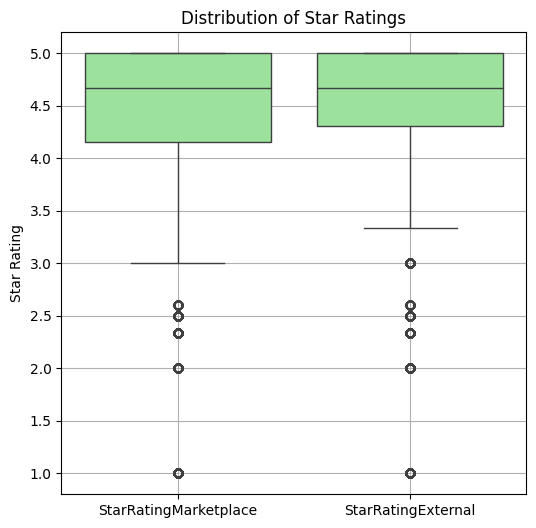

In [ ]:
# Plot a box plot
plt.figure(figsize=(6, 6))
sns.boxplot(data=df[['StarRatingMarketplace', 'StarRatingExternal']], color='lightgreen')
plt.title('Distribution of Star Ratings')
plt.ylabel('Star Rating')
plt.grid(True)
plt.show()

In [ ]:
# Remove rows with missing values
df.dropna(inplace=True)

In [ ]:
df.shape

(53322, 13)

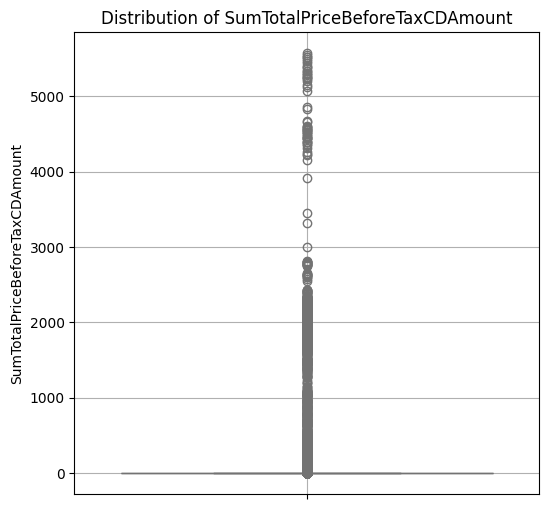

In [ ]:
# Plot a box plot
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['DistinctCountPurchaserTPID'], color='lightgreen')
plt.title('Distribution of SumTotalPriceBeforeTaxCDAmount')
plt.ylabel('SumTotalPriceBeforeTaxCDAmount')
plt.grid(True)
plt.show()

In [ ]:
df.describe()

,StarRatingExternal,StarRatingMarketplace,IsLive,IsTransactableInclusivePrivate,IsGrandTotalRowTotal,SumTotalPriceBeforeTaxCDAmount,DistinctCountPurchaserTPID,CountNumberOfRatingsExternal,CountNumberOfRatingsMarketplace
count,53322.000000,53322.000000,53322.0,53322.000000,53322.0,5.332200e+04,53322.000000,53322.0,53322.0
mean,4.507023,4.517738,1.0,0.989985,0.0,1.144830e+04,43.324163,1.0,1.0
std,0.753357,0.744362,0.0,0.099572,0.0,1.537302e+05,281.194179,0.0,0.0
min,1.000000,1.000000,1.0,0.000000,0.0,0.000000e+00,1.000000,1.0,1.0
25%,4.130304,4.158182,1.0,1.000000,0.0,1.000000e+01,1.000000,1.0,1.0
50%,4.672654,4.673178,1.0,1.000000,0.0,4.900000e+01,2.000000,1.0,1.0
75%,5.000000,5.000000,1.0,1.000000,0.0,3.190000e+02,4.000000,1.0,1.0
max,5.000000,5.000000,1.0,1.000000,0.0,1.707886e+07,5570.000000,1.0,1.0


#3.Feature engineering

In [ ]:
# Calculate duration of service period
df['ServicePeriodDuration'] = (df['ServicePeriodEndDateTime'] - df['FirstLiveDateTime']).dt.days

# Calculate duration of billing period
df['BillingPeriodDuration'] = (df['BillingPeriodEndDateTime'] - df['FirstLiveDateTime']).dt.days

In [ ]:
a=df['DistinctCountPurchaserTPID'].unique()
b=df['CountNumberOfRatingsExternal'].unique()
c=df['CountNumberOfRatingsMarketplace'].unique()
print(len(a),len(b),len(c),sep='/')

1061/1/1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53322 entries, 4 to 191826
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   PublisherName                    53322 non-null  object        
 1   StarRatingExternal               53322 non-null  float64       
 2   StarRatingMarketplace            53322 non-null  float64       
 3   IsLive                           53322 non-null  int64         
 4   IsTransactableInclusivePrivate   53322 non-null  int64         
 5   FirstLiveDateTime                53322 non-null  datetime64[ns]
 6   ServicePeriodEndDateTime         53322 non-null  datetime64[ns]
 7   BillingPeriodEndDateTime         53322 non-null  datetime64[ns]
 8   IsGrandTotalRowTotal             53322 non-null  int64         
 9   SumTotalPriceBeforeTaxCDAmount   53322 non-null  int64         
 10  DistinctCountPurchaserTPID       53322 non-null  int64   

In [ ]:
df['PublisherName_edited'] = label_encoder.fit_transform(df['PublisherName'])

In [ ]:
df['PublisherName_edited'].nunique()

253

In [ ]:
df.head()

,PublisherName,StarRatingExternal,StarRatingMarketplace,IsLive,IsTransactableInclusivePrivate,FirstLiveDateTime,ServicePeriodEndDateTime,BillingPeriodEndDateTime,IsGrandTotalRowTotal,SumTotalPriceBeforeTaxCDAmount,DistinctCountPurchaserTPID,CountNumberOfRatingsExternal,CountNumberOfRatingsMarketplace,ServicePeriodDuration,BillingPeriodDuration,PublisherName_edited
4,BioCatch,5.000000,5.00000,1,1,2021-12-07,2026-11-30,2023-12-31,0,17078862,1,1,1,1819,754,39
13,Elastic,4.369975,4.39281,1,1,2021-01-07,2023-06-30,2023-06-30,0,10964078,1894,1,1,904,904,88
22,Elastic,4.369975,4.39281,1,1,2021-01-07,2023-10-31,2023-10-31,0,8273388,2062,1,1,1027,1027,88
31,HashiCorp,4.532170,4.52163,1,1,2020-12-05,2024-07-09,2023-07-31,0,6384708,1,1,1,1312,968,107
32,HashiCorp,4.532170,4.52163,1,1,2020-12-05,2023-06-30,2022-07-31,0,6300143,1,1,1,937,603,107


#4.Data preparation for Feature selection (Applying K-Means Clustering)

In [ ]:
# Drop irrelevant columns
df_selected = df.drop(columns=['PublisherName', 'CountNumberOfRatingsExternal', 'CountNumberOfRatingsMarketplace','FirstLiveDateTime','ServicePeriodEndDateTime','BillingPeriodEndDateTime'])

In [ ]:
df_selected.head()

,StarRatingExternal,StarRatingMarketplace,IsLive,IsTransactableInclusivePrivate,IsGrandTotalRowTotal,SumTotalPriceBeforeTaxCDAmount,DistinctCountPurchaserTPID,ServicePeriodDuration,BillingPeriodDuration,PublisherName_edited
4,5.000000,5.00000,1,1,0,17078862,1,1819,754,39
13,4.369975,4.39281,1,1,0,10964078,1894,904,904,88
22,4.369975,4.39281,1,1,0,8273388,2062,1027,1027,88
31,4.532170,4.52163,1,1,0,6384708,1,1312,968,107
32,4.532170,4.52163,1,1,0,6300143,1,937,603,107


In [ ]:
# Check summary statistics to decide scoring of important features
df_selected.describe()

,StarRatingExternal,StarRatingMarketplace,IsLive,IsTransactableInclusivePrivate,IsGrandTotalRowTotal,SumTotalPriceBeforeTaxCDAmount,DistinctCountPurchaserTPID,ServicePeriodDuration,BillingPeriodDuration,PublisherName_edited
count,53322.000000,53322.000000,53322.0,53322.000000,53322.0,5.332200e+04,53322.000000,53322.000000,53322.000000,53322.000000
mean,4.507023,4.517738,1.0,0.989985,0.0,1.144830e+04,43.324163,783.130528,748.781610,133.344886
std,0.753357,0.744362,0.0,0.099572,0.0,1.537302e+05,281.194179,425.189993,409.092633,81.891802
min,1.000000,1.000000,1.0,0.000000,0.0,0.000000e+00,1.000000,0.000000,0.000000,0.000000
25%,4.130304,4.158182,1.0,1.000000,0.0,1.000000e+01,1.000000,451.000000,432.000000,62.000000
50%,4.672654,4.673178,1.0,1.000000,0.0,4.900000e+01,2.000000,733.000000,700.000000,133.000000
75%,5.000000,5.000000,1.0,1.000000,0.0,3.190000e+02,4.000000,1076.000000,1024.000000,215.000000
max,5.000000,5.000000,1.0,1.000000,0.0,1.707886e+07,5570.000000,2997.000000,2322.000000,252.000000


**Initialize KMeans clustering with desired number of clusters**

In [ ]:
# Initialize KMeans clustering with desired number of clusters
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans clustering to the data
kmeans.fit(df_selected)

# Assign clusters to each data point
train_clusters = kmeans.predict(df_selected)

**Analyze characteristics of each cluster**

In [ ]:
# Analyze characteristics of each cluster (e.g., average revenue, customer count)
cluster_characteristics = []

for cluster_label in range(num_clusters):
    # Get data points belonging to current cluster
    cluster_data = df_selected[train_clusters == cluster_label]
    # Calculate average revenue, customer count, etc. for the cluster
    average_star_rating_external = cluster_data['StarRatingExternal'].mean()
    average_star_rating_marketplace = cluster_data['StarRatingMarketplace'].mean()
    average_sum_total_price_before_tax_cd_amount = cluster_data['SumTotalPriceBeforeTaxCDAmount'].mean()
    average_distinct_count_purchaser_tpid = cluster_data['DistinctCountPurchaserTPID'].mean()
    average_service_period_duration = cluster_data['ServicePeriodDuration'].mean()
    average_billing_period_duration = cluster_data['BillingPeriodDuration'].mean()
    # Add cluster characteristics to the list
    cluster_characteristics.append({'Cluster': cluster_label,
                                     'AverageStarRatingExternal': average_star_rating_external,
                                     'AverageStarRatingMarketplace': average_star_rating_marketplace,
                                     'AverageSumTotalPriceBeforeTaxCDAmount': average_sum_total_price_before_tax_cd_amount,
                                     'AverageDistinctCountPurchaserTPID': average_distinct_count_purchaser_tpid,
                                     'AverageServicePeriodDuration': average_service_period_duration,
                                     'AverageBillingPeriodDuration': average_billing_period_duration})

**Assign score ranges to clusters based on their characteristics**

In [ ]:
# Assign score ranges to clusters based on their characteristics
score_ranges = []
for cluster_info in cluster_characteristics:
    cluster_label = cluster_info['Cluster']
    average_sum_total_price_before_tax_cd_amount = cluster_info['AverageSumTotalPriceBeforeTaxCDAmount']
    average_distinct_count_purchaser_tpid = cluster_info['AverageDistinctCountPurchaserTPID']
    # Define score ranges based on characteristics
    if average_sum_total_price_before_tax_cd_amount > 10000 and average_distinct_count_purchaser_tpid > 500:
        score_range = 'High'
    elif average_sum_total_price_before_tax_cd_amount > 1000 and average_distinct_count_purchaser_tpid > 5:
        score_range = 'Medium'
    else:
        score_range = 'Low'
    # Add score range to the list
    score_ranges.append({'Cluster': cluster_label, 'ScoreRange': score_range})

**Prediction and creation of dataframe**

In [ ]:
# First, predict the clusters for the testing data
test_clusters = kmeans.predict(df_selected)

# I create a DataFrame to store cluster predictions and corresponding scores
cluster_predictions = pd.DataFrame({'PublisherName': df['PublisherName'],
                                    'Cluster': test_clusters})
# Merge with the DataFrame containing score ranges based on cluster characteristics
cluster_predictions = cluster_predictions.merge(pd.DataFrame(score_ranges), on='Cluster', how='left')

- Now, cluster_predictions DataFrame contains the mapping of clusters to publishers and their respective scores

In [ ]:
df_selected.shape

(53322, 10)

In [ ]:
df.head()

,PublisherName,StarRatingExternal,StarRatingMarketplace,IsLive,IsTransactableInclusivePrivate,FirstLiveDateTime,ServicePeriodEndDateTime,BillingPeriodEndDateTime,IsGrandTotalRowTotal,SumTotalPriceBeforeTaxCDAmount,DistinctCountPurchaserTPID,CountNumberOfRatingsExternal,CountNumberOfRatingsMarketplace,ServicePeriodDuration,BillingPeriodDuration,PublisherName_edited
4,BioCatch,5.000000,5.00000,1,1,2021-12-07,2026-11-30,2023-12-31,0,17078862,1,1,1,1819,754,39
13,Elastic,4.369975,4.39281,1,1,2021-01-07,2023-06-30,2023-06-30,0,10964078,1894,1,1,904,904,88
22,Elastic,4.369975,4.39281,1,1,2021-01-07,2023-10-31,2023-10-31,0,8273388,2062,1,1,1027,1027,88
31,HashiCorp,4.532170,4.52163,1,1,2020-12-05,2024-07-09,2023-07-31,0,6384708,1,1,1,1312,968,107
32,HashiCorp,4.532170,4.52163,1,1,2020-12-05,2023-06-30,2022-07-31,0,6300143,1,1,1,937,603,107


In [ ]:
df.shape

(53322, 16)

In [ ]:
cluster_predictions.sample(5)

,PublisherName,Cluster,ScoreRange
1069,Thorn Technologies LLC,0,Medium
8795,xViz LLC,0,Medium
1530,SendGrid,0,Medium
31620,Nova Silva,0,Medium
20489,Apps4Rent LLC,0,Medium


In [ ]:
# Duplicated rows are present based on publishers name
cluster_predictions.shape

(53322, 3)

In [ ]:
# # It is needed to be removed so rows should not be repeating during merging operation
# cluster_predictions.drop_duplicates(inplace=True)

In [ ]:
cluster_predictions.drop_duplicates(subset=['PublisherName'], inplace=True)

In [ ]:
# Unique keys are present now i.e publishers name
cluster_predictions.shape

(253, 3)

In [ ]:
# Merge cluster_predictions with df_selected on PublisherName using an inner join to avoid duplicates
merged_df = df.merge(cluster_predictions, on='PublisherName', how='left')
merged_df.head()

,PublisherName,StarRatingExternal,StarRatingMarketplace,IsLive,IsTransactableInclusivePrivate,FirstLiveDateTime,ServicePeriodEndDateTime,BillingPeriodEndDateTime,IsGrandTotalRowTotal,SumTotalPriceBeforeTaxCDAmount,DistinctCountPurchaserTPID,CountNumberOfRatingsExternal,CountNumberOfRatingsMarketplace,ServicePeriodDuration,BillingPeriodDuration,PublisherName_edited,Cluster,ScoreRange
0,BioCatch,5.000000,5.00000,1,1,2021-12-07,2026-11-30,2023-12-31,0,17078862,1,1,1,1819,754,39,2,High
1,Elastic,4.369975,4.39281,1,1,2021-01-07,2023-06-30,2023-06-30,0,10964078,1894,1,1,904,904,88,2,High
2,Elastic,4.369975,4.39281,1,1,2021-01-07,2023-10-31,2023-10-31,0,8273388,2062,1,1,1027,1027,88,2,High
3,HashiCorp,4.532170,4.52163,1,1,2020-12-05,2024-07-09,2023-07-31,0,6384708,1,1,1,1312,968,107,1,High
4,HashiCorp,4.532170,4.52163,1,1,2020-12-05,2023-06-30,2022-07-31,0,6300143,1,1,1,937,603,107,1,High


In [ ]:
merged_df.shape

(53322, 18)

- **Label encoding is done on scoring range feature for ML models processing**

In [ ]:
# Fit and transform the "ScoreRange" column
merged_df['ScoreRange'] = label_encoder.fit_transform(merged_df['ScoreRange'])

- **Removing irrelevant columns from merged dataframe**

In [ ]:
# Removing irrelevant features
merged_df = merged_df.drop(columns=['PublisherName', 'CountNumberOfRatingsExternal', 'CountNumberOfRatingsMarketplace','FirstLiveDateTime','ServicePeriodEndDateTime','BillingPeriodEndDateTime','PublisherName_edited','Cluster'])

In [ ]:
# Now all features contain numerical variables
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53322 entries, 0 to 53321
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   StarRatingExternal              53322 non-null  float64
 1   StarRatingMarketplace           53322 non-null  float64
 2   IsLive                          53322 non-null  int64  
 3   IsTransactableInclusivePrivate  53322 non-null  int64  
 4   IsGrandTotalRowTotal            53322 non-null  int64  
 5   SumTotalPriceBeforeTaxCDAmount  53322 non-null  int64  
 6   DistinctCountPurchaserTPID      53322 non-null  int64  
 7   ServicePeriodDuration           53322 non-null  int64  
 8   BillingPeriodDuration           53322 non-null  int64  
 9   ScoreRange                      53322 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 4.5 MB


In [ ]:
merged_df.head()

,StarRatingExternal,StarRatingMarketplace,IsLive,IsTransactableInclusivePrivate,IsGrandTotalRowTotal,SumTotalPriceBeforeTaxCDAmount,DistinctCountPurchaserTPID,ServicePeriodDuration,BillingPeriodDuration,ScoreRange
0,5.000000,5.00000,1,1,0,17078862,1,1819,754,0
1,4.369975,4.39281,1,1,0,10964078,1894,904,904,0
2,4.369975,4.39281,1,1,0,8273388,2062,1027,1027,0
3,4.532170,4.52163,1,1,0,6384708,1,1312,968,0
4,4.532170,4.52163,1,1,0,6300143,1,937,603,0


In [ ]:
# Split the data into features (X) and target (y)
X = merged_df.drop(columns=['ScoreRange'])
y = merged_df['ScoreRange']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#5.SelectKBest method

In [ ]:
# Initialize SelectKBest with the desired number of features
k_best = SelectKBest(score_func=f_classif, k=6)

# Fit SelectKBest to the training data and transform the features
X_train_selected = k_best.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selectKBest_feature = X_train.columns[selected_feature_indices]

In [ ]:
selectKBest_feature

Index(['StarRatingExternal', 'IsTransactableInclusivePrivate',
       'SumTotalPriceBeforeTaxCDAmount', 'DistinctCountPurchaserTPID',
       'ServicePeriodDuration', 'BillingPeriodDuration'],
      dtype='object')

In [ ]:
# Initialize XGBoost classifier
xgb_model = XGBClassifier()

# Train the XGBoost model with the selected features
xgb_model.fit(X_train_selected, y_train)

# Transform the test features using the selected features
X_test_selected = X_test[selectKBest_feature]

# Predict on the test data
y_pred = xgb_model.predict(X_test_selected)

# Evaluate the performance of the XGBoost model using F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

F1 score: 0.9744862923247584


#6.Recursive Feature Elimination method

In [ ]:
# Initialize XGBoost classifier
xgb_model = XGBClassifier()

# Initialize RFE with XGBoost Classifier as the estimator and the desired number of features to keep
rfe = RFE(estimator=xgb_model, n_features_to_select=6)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = rfe.support_

# Get the names of the selected features
rfe_features = X_train.columns[selected_feature_indices]

In [ ]:
rfe_features

Index(['StarRatingExternal', 'StarRatingMarketplace',
       'IsTransactableInclusivePrivate', 'SumTotalPriceBeforeTaxCDAmount',
       'DistinctCountPurchaserTPID', 'BillingPeriodDuration'],
      dtype='object')

In [ ]:
# Train the XGBoost model with the selected features
xgb_model.fit(X_train[rfe_features], y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test[rfe_features])

# Evaluate the performance of the XGBoost model using F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

F1 score: 0.9750092460506156


#7.SelectFromModel with Random Forest Classifier

In [ ]:
# # Initialize Random Forest classifier
# rf_model = RandomForestClassifier()

# # Fit the Random Forest classifier to the training data
# rf_model.fit(X_train, y_train)

# # Initialize SelectFromModel with Random Forest classifier as the estimator
# sfm = SelectFromModel(estimator=rf_model)

# # Fit SelectFromModel to the training data
# sfm.fit(X_train, y_train)

# # Get the selected feature indices
# selected_feature_indices = sfm.get_support(indices=True)

# # Get the names of the selected features
# random_forest_features = X_train.columns[selected_feature_indices]

In [ ]:
# random_forest_features

In [ ]:
# # Initialize XGBoost classifier
# xgb_model = XGBClassifier()
# xgb_model.fit(X_train[random_forest_features], y_train)

# # Predict on the test data
# y_pred = xgb_model.predict(X_test[random_forest_features])

# # Evaluate the performance of the XGBoost model using F1 score
# f1 = f1_score(y_test, y_pred)
# print("F1 score:", f1)

#8.Mutual Information Feature Selection

In [ ]:
# Calculate mutual information scores for each feature
mutual_info_scores = mutual_info_classif(X_train, y_train)

# Sort the features based on their mutual information scores
sorted_indices = np.argsort(mutual_info_scores)[::-1]

# Select the top k features (let's say, 6 in this case)
mutual_info_features = X_train.columns[sorted_indices[:6]]

# Train the XGBoost model with the selected features
xgb_model.fit(X_train[mutual_info_features], y_train)

# Predict on the test data
y_pred_mutual_info = xgb_model.predict(X_test[mutual_info_features])

# Evaluate the performance of the XGBoost model using f1 score for mutual information feature selection
f1_score_mutual_info = f1_score(y_test, y_pred_mutual_info)
print("f1_score (Mutual Information):", f1_score_mutual_info)

f1_score (Mutual Information): 0.9731525924363099


In [ ]:
mutual_info_features

Index(['BillingPeriodDuration', 'StarRatingMarketplace', 'StarRatingExternal',
       'SumTotalPriceBeforeTaxCDAmount', 'ServicePeriodDuration', 'IsLive'],
      dtype='object')

##Comparison of performance between RFE vs MIFS

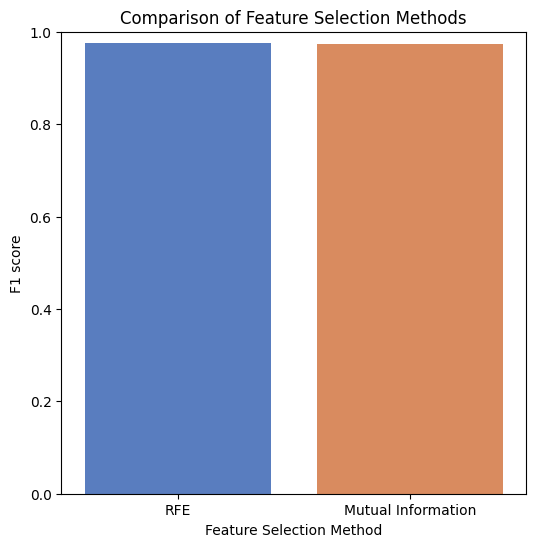

In [ ]:
# Create a bar plot to compare F1 score
plt.figure(figsize=(6, 6))
methods = ['RFE', 'Mutual Information']
f1_values = [f1, f1_score_mutual_info]
sns.barplot(x=methods, y=f1_values, palette='muted')
plt.title('Comparison of Feature Selection Methods')
plt.xlabel('Feature Selection Method')
plt.ylabel('F1 score')
plt.ylim(0, 1)
plt.show()

#9.Finalized Features importance

- **RFE has the maximum value of f1 score almost equals to 91.6. So we selected this method and check which features are important to decide the scoring range of our publishers.**

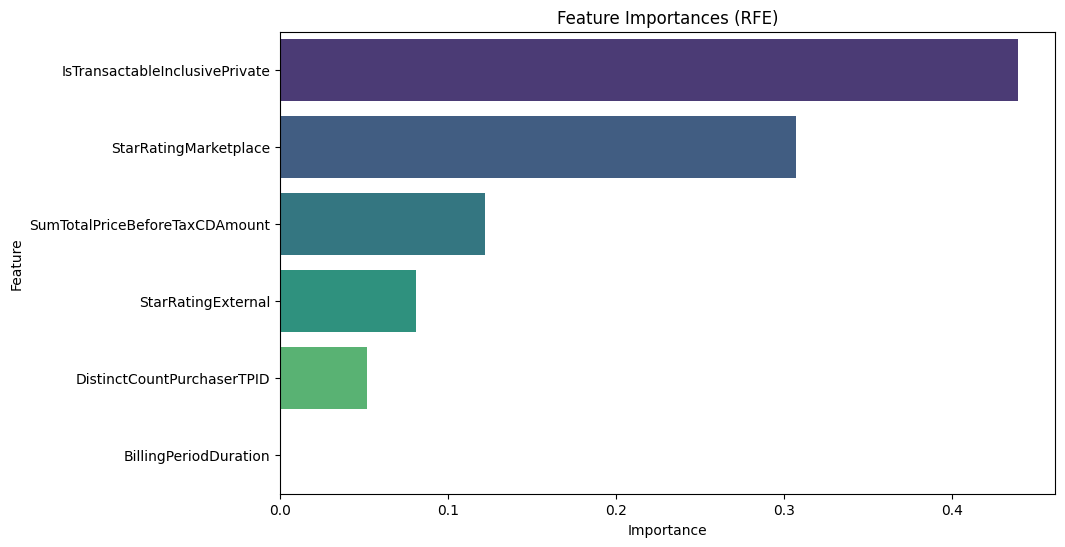

In [ ]:
# Get feature importances from the XGBoost model trained with mutual information selected features
mutual_info_feature_importances = xgb_model.feature_importances_

# Create a DataFrame to store feature names and importances
mutual_info_feature_importance_df = pd.DataFrame({'Feature': rfe_features, 'Importance': mutual_info_feature_importances})

# Sort the DataFrame by importance in descending order
mutual_info_feature_importance_df = mutual_info_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=mutual_info_feature_importance_df, palette='viridis')
plt.title('Feature Importances (RFE)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()